In [2]:
def pydistance(x1,x2):
    return sum([(x1d-x2d)**2 for x1d,x2d in zip(x1,x2)])

def pynearest(u,X,Y,distance=pydistance):
    xbest = None
    ybest = None
    dbest = float('inf')
    for x,y in zip(X,Y):
        d = distance(u,x)
        if d < dbest:
            ybest = y
            xbest = x
            dbest = d
    return ybest

def pybatch(U,X,Y,nearest=pynearest,distance=pydistance):
    return [nearest(u,X,Y,distance=distance) for u in U]

In [3]:
import data
U,X,Y = data.toy(20,100,50)
print(pybatch(U,X,Y))


[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]


In [4]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 90

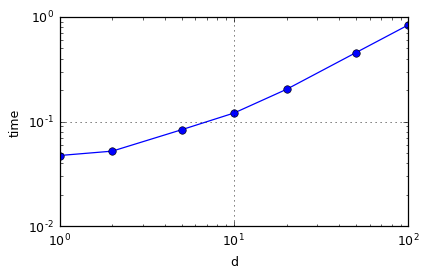

In [5]:
import time
# Values for the number of dimensions d to test
dlist = [1,2,5,10,20,50,100]
# Measure the computation time for each choice of number of dimensions d
tlist = []
for d in dlist:
    U,X,Y = data.toy(100,100,d)
    a = time.clock()
    pybatch(U,X,Y)
    b = time.clock()
    tlist += [b-a]
    
plt.figure(figsize=(5,3))
plt.plot(dlist,tlist,'-o')
plt.xscale('log');plt.yscale('log'); plt.xlabel('d'); plt.ylabel('time'); plt.grid(True)

In [6]:
import numpy
def npdistance(x1, x2):
    X1 = numpy.array(x1)
    X2 = numpy.array(x2)
    return numpy.sum((X1-X2)**2)
    #return(numpy.linalg.norm(x1 - x2))

# 

U,X,Y = data.toy(20,100,50)

npresult = pybatch(U,X,Y,nearest=pynearest,distance=npdistance)
pyresult = pybatch(U,X,Y,nearest=pynearest,distance=pydistance)

print('pybatch+pynearest+pydistance', pyresult)
print('pybatch+pynearest+npdistance', npresult)


('pybatch+pynearest+pydistance', [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])
('pybatch+pynearest+npdistance', [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])


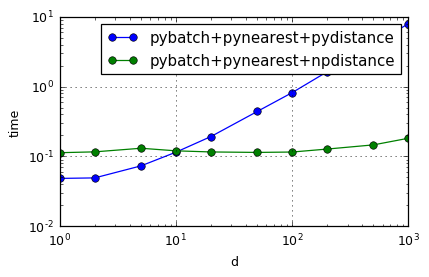

In [7]:
import time
# Values for the number of dimensions d to test
dlist = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
# Measure the computation time for each choice of number of dimensions d
pytlist = []
for d in dlist:
    U,X,Y = data.toy(100,100,d)
    py_a = time.clock()
    pybatch(U,X,Y,nearest=pynearest,distance=pydistance)
    py_b = time.clock()
    pytlist += [py_b-py_a]
    
nptlist = []
for d in dlist:
    U,X,Y = data.toy(100,100,d)
    np_a = time.clock()
    pybatch(U,X,Y,nearest=pynearest,distance=npdistance)
    np_b = time.clock()
    nptlist += [np_b-np_a]
    
plt.figure(figsize=(5,3))
plt.plot(dlist,pytlist,'-o', label='pybatch+pynearest+pydistance', color = 'blue')
plt.plot(dlist,nptlist,'-o', label='pybatch+pynearest+npdistance', color = 'green')                                              
plt.xscale('log');plt.yscale('log'); plt.xlabel('d'); plt.ylabel('time'); plt.grid(True);plt.legend()

In [8]:
U,X,Y = data.toy(20,100,50)
print(X.shape)
print(Y.shape)

(100L, 50L)
(100L,)


In [9]:
def npnearest(u,X,Y,distance=npdistance):
    #d = numpy.sum((X-u)**2,axis=1)
    #i = numpy.argmin(d)
    #return Y[i]
    distMat = X-u
    squarDistMat = distMat**2
    vecSquarDist = numpy.sum(squarDistMat,axis=1)
    indexMinDist = numpy.argmin(vecSquarDist)
    labelMinDist = Y[indexMinDist]
    return labelMinDist


U,X,Y = data.toy(20,100,50)

nplabel = pybatch(U,X,Y,nearest=npnearest,distance=npdistance)
pylabel = pybatch(U,X,Y,nearest=pynearest,distance=npdistance)


print('pybatch+pynearest+pydistance', pylabel)
print('pybatch+pynearest+npdistance', nplabel)

('pybatch+pynearest+pydistance', [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])
('pybatch+pynearest+npdistance', [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])


In [10]:
import time

nlist = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

pytlist = []
for n in nlist:
    U,X,Y = data.toy(100,n,100)
    py_a = time.clock()
    pybatch(U,X,Y,nearest=pynearest,distance=npdistance)
    py_b = time.clock()
    pytlist += [py_b-py_a]
    
nptlist = []
for n in dlist:
    U,X,Y = data.toy(100,n,100)
    np_a = time.clock()
    pybatch(U,X,Y,nearest=npnearest,distance=npdistance)
    np_b = time.clock()
    nptlist += [np_b-np_a]

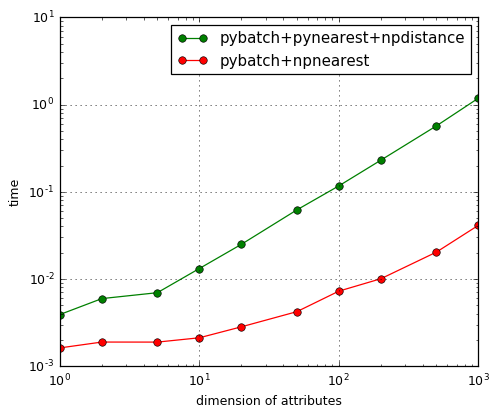

In [11]:
plt.figure(figsize=(6,5))
plt.plot(dlist,pytlist,'-o', label='pybatch+pynearest+npdistance', color = 'green')
plt.plot(dlist,nptlist,'-o', label='pybatch+npnearest', color = 'red')                                              
plt.xscale('log');plt.yscale('log'); plt.xlabel('dimension of attributes'); plt.ylabel('time'); plt.grid(True); plt.legend()

In [12]:
import scipy
import scipy.spatial

def npbatch( listOfAttrsUnlabeled , listOfAttrsLabeled , labels ):
    distMatrix = scipy.spatial.distance.cdist( listOfAttrsUnlabeled , listOfAttrsLabeled , metric='sqeuclidean' )
    indexAxisRow = 0
    indexAxisCol = 1
    rowOfIndexOfAttrsLabeled_withMinDist = numpy.argmin( distMatrix, axis=indexAxisCol )
    labelsMinDist = labels[ rowOfIndexOfAttrsLabeled_withMinDist ]
    return labelsMinDist

listOfAttrsUnlabeled,listOfAttrsLabeled,labels = data.toy(20,100,50)

nplabels = npbatch(listOfAttrsUnlabeled,listOfAttrsLabeled,labels)
pylabels = pybatch(listOfAttrsUnlabeled,listOfAttrsLabeled,labels,nearest=npnearest,distance=npdistance)

print('pybatch+npnearest', pylabels)
print('npbatch', nplabels)
if (pylabels==nplabels).all():
    print 'npbatch and pybatch give same results.'


('pybatch+npnearest', [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])
('npbatch', array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]))
npbatch and pybatch give same results.


In [13]:
import time

mlist = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

pytlist = []
for m in mlist:
    U,X,Y = data.toy(m,100,100)
    py_a = time.clock()
    pybatch(U,X,Y,nearest=npnearest,distance=npdistance)
    py_b = time.clock()
    pytlist += [py_b-py_a]
    
nptlist = []
for m in mlist:
    U,X,Y = data.toy(m,100,100)
    np_a = time.clock()
    npbatch(U,X,Y)
    np_b = time.clock()
    nptlist += [np_b-np_a]

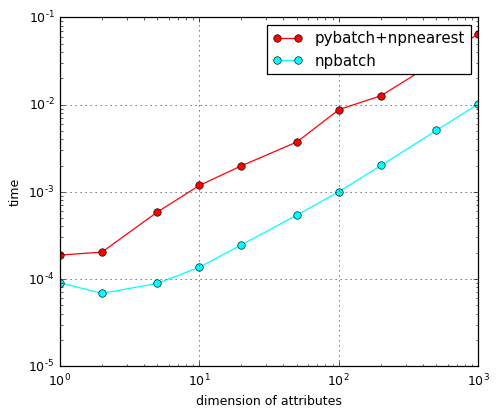

In [14]:
plt.figure(figsize=(6,5))
plt.plot(dlist,pytlist,'-o', label='pybatch+npnearest', color = 'red')
plt.plot(dlist,nptlist,'-o', label='npbatch', color = 'cyan')                                              
plt.xscale('log');plt.yscale('log'); plt.xlabel('dimension of attributes'); plt.ylabel('time'); plt.grid(True)
plt.legend()

In [15]:
picsFlat,labels = data.digits()

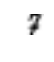

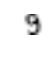

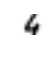

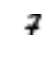

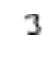

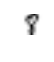

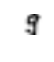

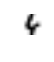

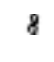

In [23]:
for indexPic in range(9):#for 100 I get a memory warning.
    picFlat = picsFlat[indexPic]
    picMatrix = picFlat.reshape(8,8)
    fig = plt.figure()
    plt.imshow(picMatrix, interpolation='bilinear', cmap='Greys' )
    #fig,axes = plt.subplots(3,3)
    #axes[int(indexPic/3),indexPic%3].imshow(picMatrix, interpolation='bilinear', cmap='Greys' )
    plt.axis('off')
    fig.set_size_inches(0.3,0.3)

In [17]:
indexEndTraining = 1000
picsTraining = picsFlat[0:indexEndTraining]
labelsTraining = labels[0:indexEndTraining]
picsTest = picsFlat[indexEndTraining:len(picsFlat)]
labelsTestGiven = labels[indexEndTraining:len(picsFlat)]

In [18]:
labelsTestComputed = npbatch( picsTest , picsTraining , labelsTraining )
print labelsTestComputed

[0 7 3 5 9 4 7 2 5 6 1 2 7 0 0 6 2 2 4 4 3 4 0 2 7 9 1 4 4 4 9 4 7 7 3 1 4
 9 9 3 2 4 0 4 2 7 7 5 4 1 4 5 7 9 3 7 2 8 4 9 8 3 7 6 5 5 7 4 3 7 3 5 0 3
 5 0 0 7 0 5 9 3 3 4 7 9 4 8 6 4 0 0 8 2 9 4 6 4 9 0 0 3 1 6 5 1 0 1 9 2 2
 8 2 6 1 1 3 8 2 3 5 5 8 0 5 4 8 0 7 3 6 4 0 8 9 4 8 9 9 7 4 4 6 8 4 5 2 9
 9 4 0 5 8 5 2 2 7 6 4 8 3 0 7 6 5 6 1 0 9 3 5 6 3 6 3 3 0 0 1 4 1 1 9 3 8
 8 8 8 2 0 7 6 5 6 8 2 0 6 8 6 0 0 0 6 9 3 7 0 1 8 9 9 9 1 7 0 5 5 5 6 4 1
 4 8 6 6 8 3 1 0 5 2 2 6 8 4 2 1 0 4 6 9 9 6 1 7 2 3 4 0 5 5 7 4 8 1 1 7 8
 7 1 7 5 1 2 1 3 2 2 9 8 7 8 2 7 2 7 1 0 9 2 8 4 2 1 0 4 2 7 2 6 9 2 1 2 5
 4 7 1 6 3 4 4 7 0 0 9 9 9 9 9 9 1 1 9 5 7 3 8 4 8 6 6 3 1 8 6 8 4 3 6 2 3
 2 1 1 8 1 9 4 4 9 0 1 7 9 8 3 6 2 2 5 4 1 2 6 1 1 2 3 6 7 8 3 4 4 4 6 5 9
 4 6 6 1 3 2 6 5 7 9 4 7 6 8 5 6 1 9 1 9 7 5 7 8 8 5 1 0 7 2 6 9 1 0 7 3 2
 2 7 3 0 7 0 9 3 8 8 3 6 2 4 2 8 5 9 6 2 7 6 2 9 5 5 3 8 2 6 2 7 5 3 8 3 0
 3 0 4 0 2 8 5 1 0 7 7 3 2 7 6 8 8 3 7 4 9 5 0 4 1 1 2 1 3 6 5 0 5 1 2 6 1
 5 4 7 4 8 4 1 8 8 8 8 8 

In [19]:
matches = labelsTestGiven==labelsTestComputed
print matches

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [20]:
print 'number of errors = '+str(len(numpy.where(matches==False)[0]))

number of errors = 7


In [21]:
print 'fraction of error = '+str(len(numpy.where(matches==False)[0])/float(len(matches)))

fraction of error = 0.00878293601004
